<a href="https://colab.research.google.com/github/LeeTae-hyun/GIS_Python/blob/master/Lab_06_DEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install numpy
! pip install rastrio
! pip install matplotlib
! pip install richdem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement rastrio (from versions: none)
ERROR: No matching distribution found for rastrio
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.4/329.4 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for richdem: filename=richdem-0.3.4-cp38-cp38-linux_x86_64.whl size=7997058 sha256=c747acd2dffcc25458c141330a5322e5e935eb82b58ff4e517e4be4ce9d211df
  Stored in directory: /root/.cache/pip/wheels/9f/9c/61/8da642da1b65cbf887fa5d335778dfcefe22fba629e6b055d4
Successfully built richdem


In [ ]:
! pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 59.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
dem = rio.open("/content/drive/MyDrive/GeoPython(2023GIS)/Lab06_Raster data/Gwanghwa.tif")
dem_array = dem.read(1).astype('float64')

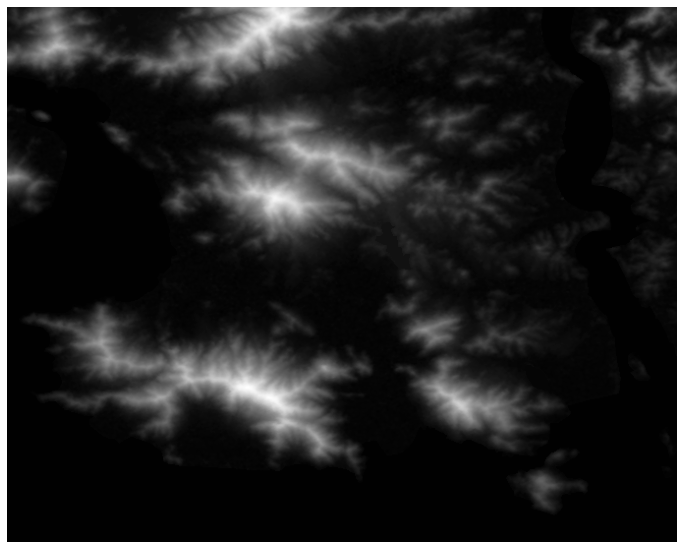

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
plt.axis('off')
plt.show()

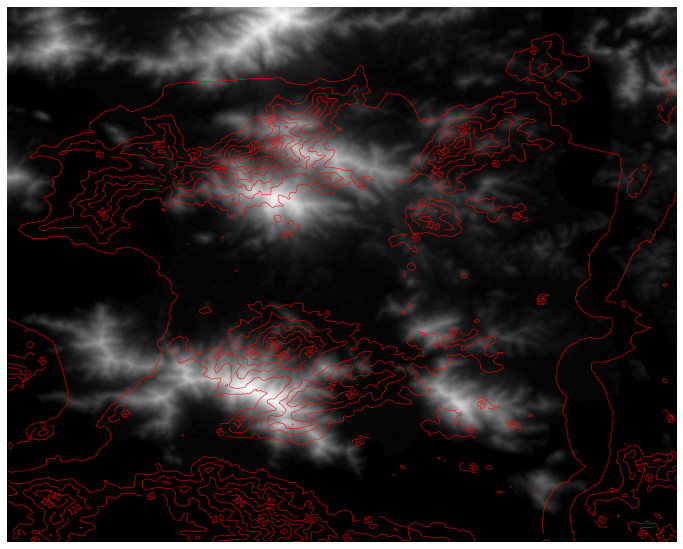

In [ ]:
#등고선(contour) 추가
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
show(dem_array, contour=True, ax=ax, linewidths=0.7)
plt.axis("off")
plt.show()

In [ ]:
import richdem as rd
dem_richdem = rd.rdarray(dem_array, no_data=-9999)

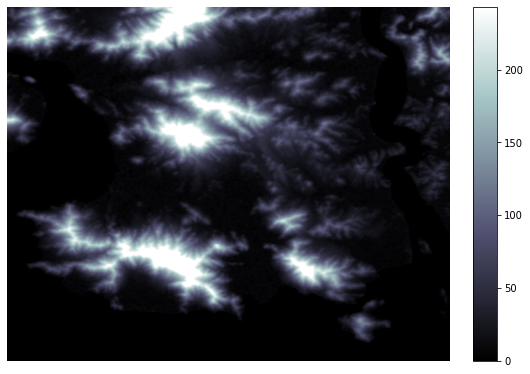

{'vmin': 0.0, 'vmax': 243.0}

In [ ]:
#richdem 이용 시각화
fig = rd.rdShow(dem_richdem, axes=False, cmap='bone', figsize=(8, 5.5));
fig

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


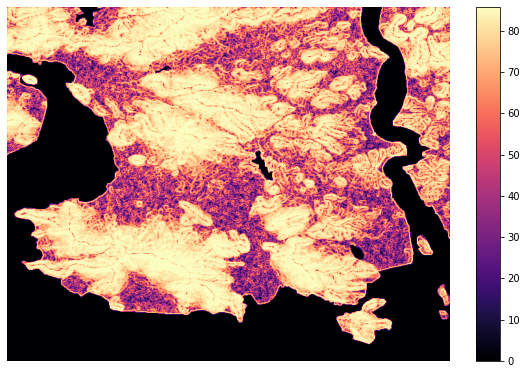

In [ ]:
#slope
dem_slope = rd.TerrainAttribute(dem_richdem, attrib='slope_degrees')
rd.rdShow(dem_slope, axes=False, cmap='magma', figsize=(8, 5.5));
plt.show()

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


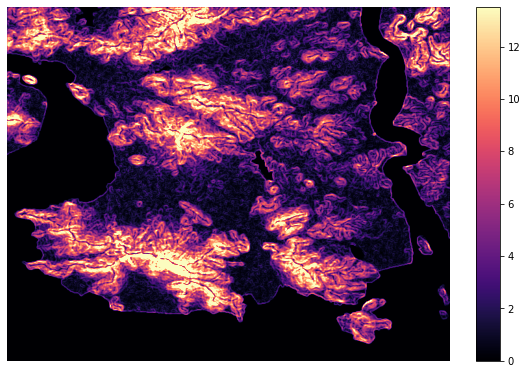

In [ ]:
# https://www.earthdatascience.org/tutorials/get-slope-aspect-from-digital-elevation-model/
slope = rd.TerrainAttribute(dem_richdem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


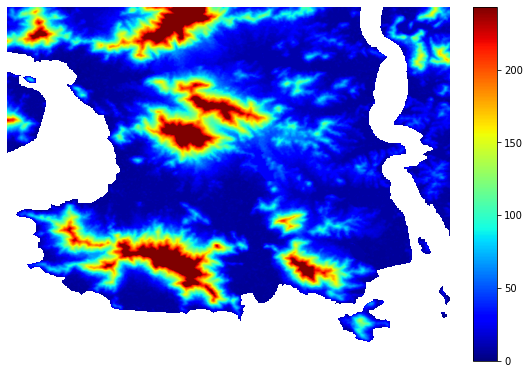

In [ ]:
#기압
dem_filled = rd.FillDepressions(dem_richdem, in_place=False)
dem_filled_fig = rd.rdShow(dem_filled, ignore_colours=[0], axes=False, cmap='jet', vmin=fig['vmin'], vmax=fig['vmax'], figsize=(8,5.5))

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


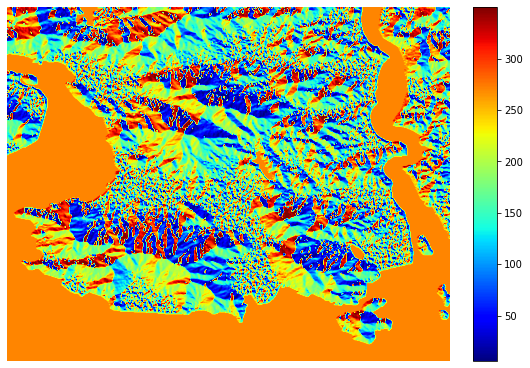

In [ ]:
aspect = rd.TerrainAttribute(dem_richdem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
plt.show()